In [43]:
import os 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()


In [44]:
os.mkdir('./plots')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './plots'

In [45]:
#  Store predictions into All; All Pedestrians; All except Pedestrians; 
#  Only store if the prediction value is above 50% conf. 

def predictions(experiment_path, files): 
    all_predictions = []
    only_pedestrians = [] 
    not_pedestrians = [] 

    for fp in files: 
        with open(experiment_path + fp) as f: 
            line = f.readline()
            while line:
                l = [fp]
                [l.append(float(x)) for x in line.strip().split(' ')]

                if l[-1] > 0.5: 
                    all_predictions.append(l)  
                    if l[1] == 3: 
                        only_pedestrians.append(l)
                    else: 
                        not_pedestrians.append(l)
                line = f.readline()

    all_r = np.array(all_predictions)
    print(np.shape(np.unique(all_r[:,0])))

    ped_r = np.array(only_pedestrians)
    # print(np.shape(np.unique(ped_r[:,0])))

    notp_r = np.array(not_pedestrians)
    # print(np.shape(np.unique(notp_r[:,0])))
    return all_r, ped_r, notp_r

#  Store predictions into All; All Pedestrians; All except Pedestrians; 
#  Only store if the prediction value is above 50% conf. 

def label_ext(experiment_path, files): 
    all_predictions = []

    for fp in files: 
        with open(experiment_path + fp) as f: 
            line = f.readline()
            while line:
                l = [fp]
                [l.append(float(x)) for x in line.strip().split(' ')]

                all_predictions.append(l)  
                line = f.readline()
    
    all_r = np.array(all_predictions)
    print(np.shape(np.unique(all_r[:,0])))
    return all_r

*Experiments run:*

**Added Boxes as occlusion:**

boxes_yolo_regular

boxes_yolo_upper

boxes_yolo_lower

**Added wall as occlusion:**

wall_yolo_regular

wall_yolo_upper

wall_yolo_lower



In [46]:
def plot_experiments(experiment_location):
    test_files = os.listdir(experiment_location)

    ## Sort confidence predictions based on 
    yolo_predictions, yolo_pedestrians, yolo_nonpedestrians = predictions(experiment_location, test_files)
    conf_sorted = yolo_pedestrians[np.argsort(yolo_pedestrians[:,-1])][:, [0, -1]]
    a = conf_sorted[:,1].astype('float32')[::-1]

    #fig, ax = plt.subplots(figsize=(12, 6))
    #plt.ylim([0.5, 1.0])
    #ax.plot(a)
    return yolo_predictions

In [47]:
experiment_location = './results/Occluded-runs/test/boxes_yolo_regular/labels/'
box_regular = plot_experiments(experiment_location)
experiment_location = './results/Occluded-runs/test/boxes_yolo_upper/labels/'
box_upper = plot_experiments(experiment_location)
experiment_location = './results/Occluded-runs/test/boxes_yolo_lower/labels/'
box_lower = plot_experiments(experiment_location)


experiment_location = './results/Occluded-runs/test/wall_yolo_regular/labels/'
wall_regular = plot_experiments(experiment_location)
experiment_location = './results/Occluded-runs/test/wall_yolo_upper/labels/'
wall_upper = plot_experiments(experiment_location)
experiment_location = './results/Occluded-runs/test/wall_yolo_lower/labels/'
wall_lower = plot_experiments(experiment_location)


(291,)
(251,)
(305,)
(311,)
(309,)
(287,)


In [48]:
experiment_location = './experiments/results/boxes_yolo_regular/labels/'
box_regular = plot_experiments(experiment_location)
experiment_location = './experiments/results/boxes_yolo_upper/labels/'
box_upper = plot_experiments(experiment_location)
experiment_location = './experiments/results/boxes_yolo_lower/labels/'
box_lower = plot_experiments(experiment_location)


experiment_location = './experiments/results/wall_yolo_regular/labels/'
wall_regular = plot_experiments(experiment_location)
experiment_location = './experiments/results/wall_yolo_upper/labels/'
wall_upper = plot_experiments(experiment_location)
experiment_location = './experiments/results/wall_yolo_lower/labels/'
wall_lower = plot_experiments(experiment_location)


(291,)
(251,)
(305,)
(311,)
(309,)
(287,)


In [49]:
# Yolo Regular results 
experiment_location = './results/test/yolo/labels/'
yolo_regular = plot_experiments(experiment_location)

testing_path = './subset/labels/'
test_files = os.listdir(testing_path)
labels = label_ext(testing_path, test_files)

unique_test_files = np.unique(labels[:,0])
res = []

for utf in unique_test_files: 
    
    yy = np.array(yolo_regular[yolo_regular[:,0]==utf,:])[:,1:].astype('float32')

    ym = yy[yy[:,0]==3,-1]
    
    res.append([0 if ym.size==0 else ym.mean()])
    
yolo_reg = np.array(res)
#rr = rr[~np.all(rr == 0, axis=1)]
#yolo_sort_array = np.argsort(rr[:,0])
# yolo_reg = rr[yolo_sort_array,:]

#fig, ax = plt.subplots(figsize=(12, 6))
#plt.ylim([0.5, 1.0])
#ax.plot(yolo_reg[:,0], 'b.')
#ax.legend(['Full', 'lower', 'upper'])
#plt.title('Occluded with Walls')

(748,)
(314,)


In [50]:

# Boxes testing:
testing_path = './subset/labels/'
test_files = os.listdir(testing_path)
labels = label_ext(testing_path, test_files)

unique_test_files = np.unique(labels[:,0])
res = []

for utf in unique_test_files: 
    
    yy = np.array(box_regular[box_regular[:,0]==utf,:])[:,1:].astype('float32')
    ly = np.array(box_lower[box_lower[:,0]==utf,:])[:,1:].astype('float32')
    uy = np.array(box_upper[box_upper[:,0]==utf,:])[:,1:].astype('float32')

    ym = yy[yy[:,0]==3,-1]
    lm = ly[ly[:,0]==3,-1]
    um = uy[uy[:,0]==3,-1]
    
    res.append([0 if ym.size==0 else ym.mean(), 0 if lm.size==0 else lm.mean(), 0 if um.size==0 else um.mean()])
    

rr = np.array(res)
ry = yolo_reg[~np.all(rr == 0, axis=1)]
index_vector = np.array(~np.all(rr == 0, axis=1))
rr = rr[index_vector]
sort_array = np.argsort(rr[:,0])

subset_names = unique_test_files[index_vector]
subset_names = subset_names[sort_array] 

rs = rr[sort_array,:]
ry = ry[sort_array,:]


(314,)


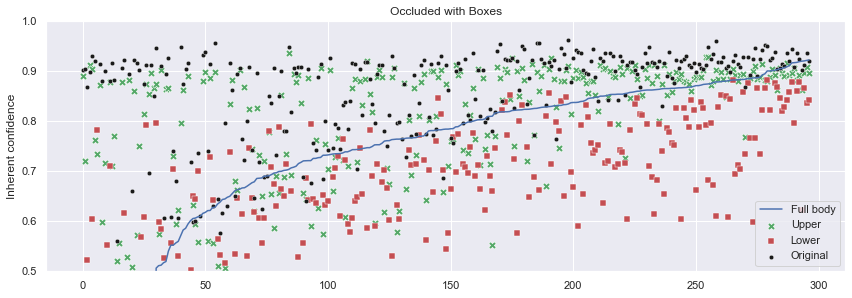

In [52]:
fig, ax = plt.subplots(figsize=(12, 4.3))
plt.ylim([0.5, 1.0])
xr = [x for x in range(len(ry))]
sns.lineplot(data=rs[:,0], color='b')
sns.scatterplot(data=rs[:,1], color='g', marker='X', s=55)
sns.scatterplot(data=rs[:,2], color='r', marker='s')#, s=20)
sns.scatterplot(data=np.squeeze(ry),  color='k', s=20)
#sns.scatterplot(x=nxr, y=negatives, color='r',marker='s')

ax.legend(['Full body', 'Upper', 'Lower', 'Original'],loc='lower right')
plt.ylabel('Inherent confidence')
plt.title('Occluded with Boxes')
plt.tight_layout()
plt.savefig('./plots/confidence_box_occluded.pdf')


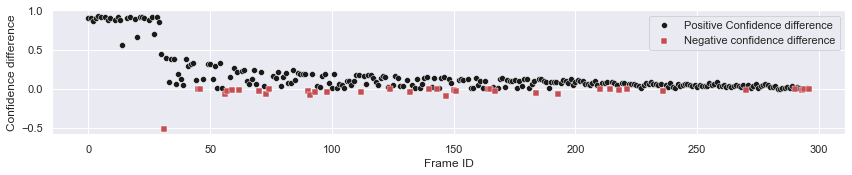

In [53]:

diff_vector = np.squeeze(ry)-rs[:,0]

xr = [x for x in range(len(diff_vector))]
positives = diff_vector[diff_vector > 0]
negatives = diff_vector[diff_vector < 0]
pxr = np.array(xr)[diff_vector > 0]
nxr = np.array(xr)[diff_vector < 0]

fig, ax = plt.subplots(figsize=(12, 2.6))
sns.scatterplot(x=pxr, y=positives, color='k')
sns.scatterplot(x=nxr, y=negatives, color='r',marker='s')

ax.legend(['Positive Confidence difference', 'Negative confidence difference'])
# ax.set(xscale="log", yscale="log")
plt.ylabel('Confidence difference')
plt.xlabel('Frame ID')
plt.tight_layout()
plt.savefig('./plots/difference_box_occluded.pdf')

In [54]:
ns = len(unique_test_files)
lrs = len(rs)

# print("Percent missed predictions:", np.sum(np.abs(diff_vector)>0.5)/314)
print("Percent missed predictions:", (np.sum(np.abs(diff_vector)>0.5)+(ns-lrs))/ns )
print("Better with original:", np.sum(diff_vector>0)/314)

print("Average confidence:", np.average(rs,axis=0))
print("Average confidence loss:", np.sum(diff_vector)/314)


both = np.array(np.logical_and(rr[:,1] > rr[:,0], rr[:,2] > rr[:,0]))
upper = np.array(rr[:,2] > rr[:,0])
lower = np.array(rr[:,1] > rr[:,0])

print("Which is best? Both, lower, upper"), both.sum(), lower.sum(), upper.sum(), len(rr)

Percent missed predictions: 0.13694267515923567
Better with original: 0.7993630573248408
Average confidence: [0.70360659 0.76585071 0.53187344]
Average confidence loss: 0.1324368295775857
Which is best? Both, lower, upper


(None, 28, 187, 41, 297)

In [55]:
subset_names[31]

'000553.txt'

In [56]:
# Walls testing:
testing_path = './subset/labels/'
test_files = os.listdir(testing_path)
labels = label_ext(testing_path, test_files)

unique_test_files = np.unique(labels[:,0])
res = []

for utf in unique_test_files: 
    
    yy = np.array(wall_regular[wall_regular[:,0]==utf,:])[:,1:].astype('float32')
    ly = np.array(wall_lower[wall_lower[:,0]==utf,:])[:,1:].astype('float32')
    uy = np.array(wall_upper[wall_upper[:,0]==utf,:])[:,1:].astype('float32')

    ym = yy[yy[:,0]==3,-1]
    lm = ly[ly[:,0]==3,-1]
    um = uy[uy[:,0]==3,-1]
    
    res.append([0 if ym.size==0 else ym.mean(), 0 if lm.size==0 else lm.mean(), 0 if um.size==0 else um.mean()])
    
rr = np.array(res)
ry = yolo_reg[~np.all(rr == 0, axis=1)]
rr = rr[~np.all(rr == 0, axis=1)]
sort_array = np.argsort(rr[:,0])

rs = rr[sort_array,:]
ry = ry[sort_array]



(314,)


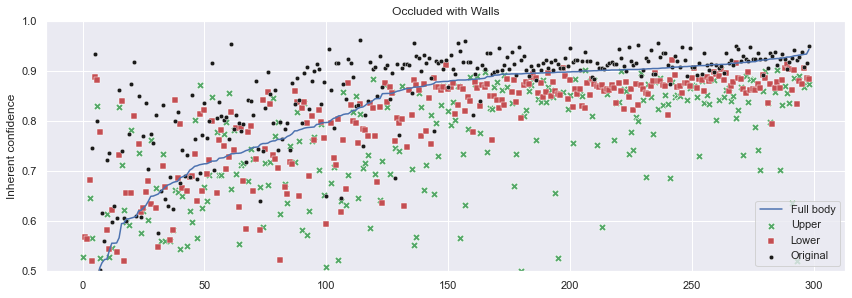

In [57]:
xr = [x for x in range(len(diff_vector))]
positives = diff_vector[diff_vector > 0]
negatives = diff_vector[diff_vector < 0]
pxr = np.array(xr)[diff_vector > 0]
nxr = np.array(xr)[diff_vector < 0]

fig, ax = plt.subplots(figsize=(12, 4.3))
plt.ylim([0.5, 1.0])
xr = [x for x in range(len(ry))]
sns.lineplot(data=rs[:,0], color='b')
sns.scatterplot(data=rs[:,1], color='g', marker='X', s=55)
sns.scatterplot(data=rs[:,2], color='r', marker='s')#, s=20)
sns.scatterplot(data=np.squeeze(ry),  color='k', s=20)
#sns.scatterplot(x=nxr, y=negatives, color='r',marker='s')

ax.legend(['Full body', 'Upper', 'Lower', 'Original'],loc='lower right')
plt.ylabel('Inherent confidence')
plt.title('Occluded with Walls')
plt.tight_layout()
plt.savefig('./plots/confidence_wall_occluded.pdf')


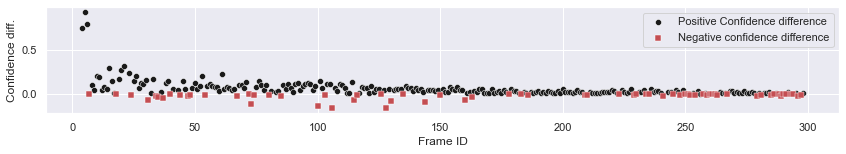

In [58]:

diff_vector = np.squeeze(ry)-rs[:,0]

xr = [x for x in range(len(diff_vector))]
positives = diff_vector[diff_vector > 0]
negatives = diff_vector[diff_vector < 0]
pxr = np.array(xr)[diff_vector > 0]
nxr = np.array(xr)[diff_vector < 0]

fig, ax = plt.subplots(figsize=(12, 2.3))
sns.scatterplot(x=pxr, y=positives, color='k')
sns.scatterplot(x=nxr, y=negatives, color='r',marker='s')

ax.legend(['Positive Confidence difference', 'Negative confidence difference'])
# ax.set(xscale="log", yscale="log")
plt.ylabel('Confidence diff.')
plt.xlabel('Frame ID')
plt.tight_layout()
plt.savefig('./plots/difference_wall_occluded.pdf')

In [59]:
ns = len(unique_test_files)
lrs = len(rs)

print("Percent missed predictions:", np.sum(np.abs(diff_vector)>0.5)/314)
print("Percent missed predictions:", (np.sum(np.abs(diff_vector)>0.5)+(ns-lrs))/ns )
print("Better with original:", np.sum(diff_vector>0)/314)

print("Average confidence:", np.average(rs,axis=0))
print("Average confidence loss:", np.sum(diff_vector)/314)


both = np.array(np.logical_and(rr[:,1] > rr[:,0], rr[:,2] > rr[:,0]))
upper = np.array(rr[:,2] > rr[:,0])
lower = np.array(rr[:,1] > rr[:,0])

print("Which is best? Both, lower, upper"), both.sum(), lower.sum(), upper.sum(), len(rr)


Percent missed predictions: 0.009554140127388535
Percent missed predictions: 0.05732484076433121
Better with original: 0.7133757961783439
Average confidence: [0.80975082 0.65431397 0.76395925]
Average confidence loss: 0.039419087444900705
Which is best? Both, lower, upper


(None, 19, 37, 62, 299)